In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas

from weave_units import WeaveUnit
from tile_map import Tiling

In [2]:
us = geopandas.read_file("../data/states.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100
us['Green'] = us.grn / us.votes * 100
us['Libertarian'] = us.lib / us.votes * 100

In [3]:
w3 = WeaveUnit(spacing = 10000, aspect = 1, weave_type = "twill", n = 4, 
                    margin = 0, strands = "ab-|cd-", crs = us.crs)

<AxesSubplot:>

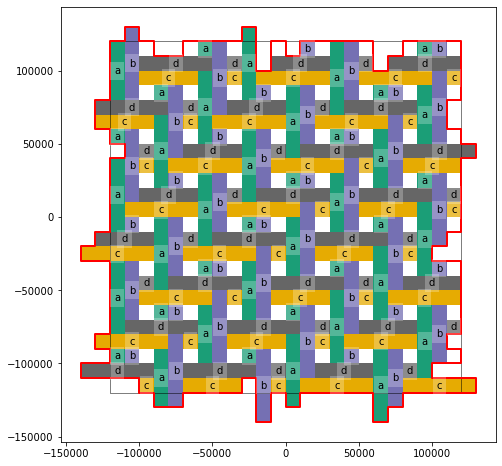

In [4]:
w3.plot()

In [5]:
tiling = Tiling(w3, us, id_var = "state")

In [6]:
election_map = tiling.get_tiled_map(rotation = 30, prioritise_tiles = False)

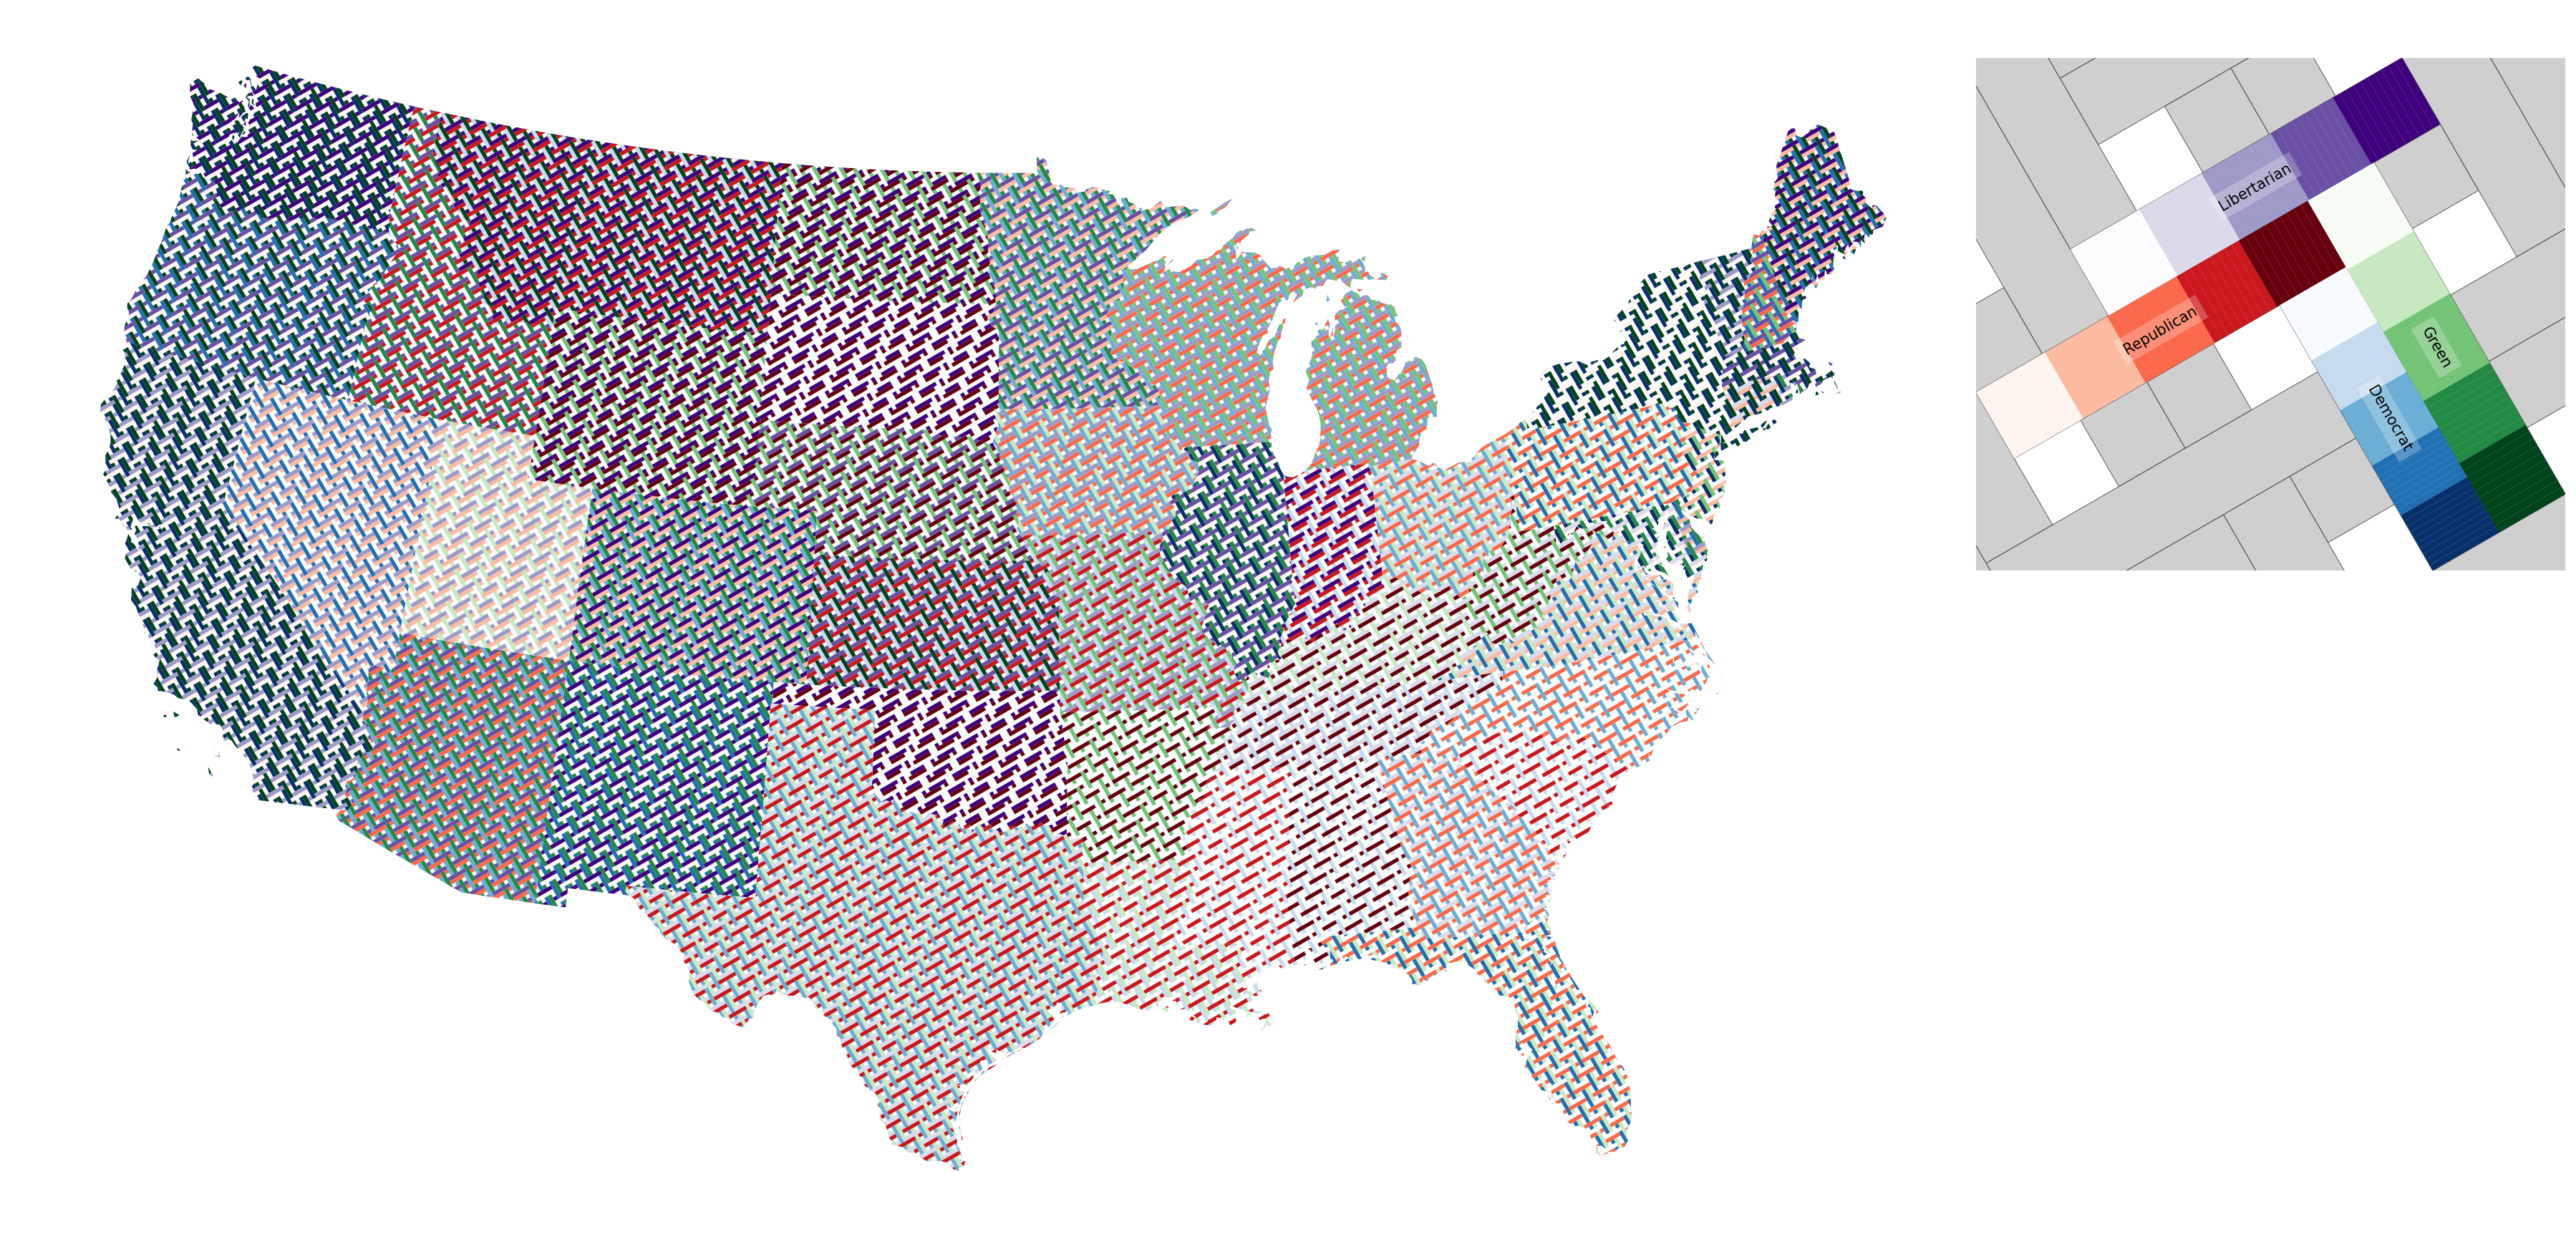

In [10]:
fig = pyplot.figure(figsize = (24, 15), dpi = 150)

cols = dict(zip(list("abcd"), 
                ["Democrat", "Green", "Republican", "Libertarian"]))
cmaps = dict(zip(list("abcd"),
                 ("Blues", "Greens", "Reds", "Purples")))

ax = tiling.plot_map(fig, election_map, cols, cmaps, legend = True, 
                     scheme = "quantiles", k = 5)